# Import required libraries


In [48]:
import pandas as pd
import numpy as np

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('Tamil_Cuisine_Analysis.csv', encoding="utf-8")


In [50]:
df.columns

Index(['recipe_name', 'ingredients', 'cooking_time', 'servings', 'difficulty',
       'meal_type', 'cuisine', 'equipment', 'method', 'calories', 'fat',
       'protein', 'carbohydrates', 'taste_flavorprofile', 'diet'],
      dtype='object')

In [51]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

def nlp_preprocessing(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]

    # Stemming
    #stemmer = PorterStemmer()
    #tokens = [stemmer.stem(w) for w in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(w) for w in tokens]

    # Remove short words
    tokens = [w for w in tokens if len(w) > 2]

    # Join the tokens back into a string
    text = " ".join(tokens)

    return text


equipment=[]
for i in df["equipment"]:
        x=nlp_preprocessing(i)
        equipment=[x]
        print(equipment)

In [52]:
df.head()

,recipe_name,ingredients,cooking_time,servings,difficulty,meal_type,cuisine,equipment,method,calories,fat,protein,carbohydrates,taste_flavorprofile,diet
0,chettinad chicken curry,"500 g chicken, 2 onions, 2 tomatoes, 2 green c...",40 minutes,4,medium,main dish,chettinad,"pressure cooker or pan, spatula, blender or gr...","marinate chicken, cook with onions, tomatoes, ...",300,15,30,10,"spicy, savory",non-vegetarian
1,chettinad pepper chicken,"500 g chicken, 2 onions, 2 tomatoes, 1 inch gi...",40 minutes,4,medium,main dish,chettinad,"pressure cooker or pan, spatula","marinate chicken, cook with onions, tomatoes, ...",250,12,25,8,"spicy, peppery, savory",non-vegetarian
2,chettinad fish fry,"500 g fish, 2 tsp red chili powder, 1 tsp turm...",30 minutes,4,easy,appetizer or side dish,chettinad,"pan, spatula","marinate fish with spices and lemon juice, and...",200,10,20,5,"spicy, tangy, crispy",non-vegetarian
3,chettinad mutton curry,"500 g mutton, 2 onions, 2 tomatoes, 2 green ch...",1 hour,4,hard,main dish,chettinad,"pressure cooker or pan, spatula","marinate mutton, cook with onions, tomatoes, g...",400,25,40,10,"spicy, savory",non-vegetarian
4,chettinad egg curry,"6 boiled eggs, 2 onions, 2 tomatoes, 2 green c...",30 minutes,4,easy,main dish,chettinad,"pan, spatula","heat oil in a pan and add fennel seeds, cumin ...",230,17,8,10,"spicy, flavourful, creamy",non-vegetarian


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   recipe_name          96 non-null     object
 1   ingredients          96 non-null     object
 2   cooking_time         96 non-null     object
 3   servings             96 non-null     int64 
 4   difficulty           96 non-null     object
 5   meal_type            96 non-null     object
 6   cuisine              96 non-null     object
 7   equipment            96 non-null     object
 8   method               96 non-null     object
 9   calories             96 non-null     int64 
 10  fat                  96 non-null     int64 
 11  protein              96 non-null     int64 
 12  carbohydrates        96 non-null     int64 
 13  taste_flavorprofile  96 non-null     object
 14  diet                 96 non-null     object
dtypes: int64(5), object(10)
memory usage: 11.4+ KB


## Feature Selection

In [56]:
df['fat'] = df['fat'].astype(int)

In [57]:
df['protein'] = df['protein'].astype(int)

In [59]:
df['carbohydrates'] = df['carbohydrates'].astype(int )

In [60]:
X=df.drop(['recipe_name', 'ingredients', 'cooking_time', 'difficulty',
       'meal_type', 'cuisine', 'equipment', 'method', 'taste_flavorprofile',"diet"],axis=1)


In [61]:
diet_map = {'vegetarian': 0,'non-vegetarian':1}


In [62]:
df['diet'] = df['diet'].map(diet_map)


In [63]:
df['diet'].value_counts()

0    70
1    26
Name: diet, dtype: int64

In [64]:
y=df['diet']

In [65]:
y

0     1
1     1
2     1
3     1
4     1
     ..
91    0
92    0
93    0
94    0
95    0
Name: diet, Length: 96, dtype: int64

## Model Development

In [66]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gaussian NB model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the performance of the model
gnb_y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, gnb_y_pred)
print('Accuracy of Gaussian NB:', accuracy)


Accuracy of Gaussian NB: 0.7931034482758621


In [67]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train decision tree classifier on training set
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on test set
clf_y_pred = clf.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, clf_y_pred)
print("Accuracy of Decision tree Classifier:", accuracy)


Accuracy of Decision tree Classifier: 0.8620689655172413


In [68]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Gaussian NB model
rf_cls = RandomForestClassifier()
rf_cls.fit(X_train, y_train)

# Evaluate the performance of the model
rf_cls_y_pred = rf_cls.predict(X_test)
accuracy = accuracy_score(y_test, rf_cls_y_pred)
print('Accuracy of Random Forest Classifier:', accuracy)


Accuracy of Random Forest Classifier: 0.8275862068965517


## Evaluation Metrics

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [70]:
def evaluation(y_pred,y_test):
    # Evaluate the model on the testing set using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    # Print the evaluation metrics
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1 score:', f1)
    print('ROC AUC score:', roc_auc)

### Evaluation of Gaussian Naive Bayes

In [71]:
evaluation(gnb_y_pred, y_test)

Accuracy: 0.7931034482758621
Precision: 0.5
Recall: 0.6666666666666666
F1 score: 0.5714285714285715
ROC AUC score: 0.7463768115942029


### Evaluation of Decision Tree Classifier

In [72]:
evaluation(clf_y_pred, y_test)

Accuracy: 0.8620689655172413
Precision: 0.625
Recall: 0.8333333333333334
F1 score: 0.7142857142857143
ROC AUC score: 0.8514492753623188


### Evaluation of Random Forest Classifier

In [73]:
evaluation(rf_cls_y_pred, y_test)

Accuracy: 0.8275862068965517
Precision: 0.6
Recall: 0.5
F1 score: 0.5454545454545454
ROC AUC score: 0.7065217391304348


# Multi Layer Neural network

This is a multi-layer neural network built using the TensorFlow library in Python. It has two hidden layers with 64 neurons each and one output layer with a single neuron and sigmoid activation function. The loss function used is binary cross-entropy and the optimizer used is Adam. The metrics used to evaluate the model are accuracy and AUC.

In [74]:
import tensorflow as tf 


def build_model(num_features, hidden_layer_sizes=(64,64)):
    inputs = tf.keras.Input(shape=(num_features,))
    x = tf.keras.layers.Dense(hidden_layer_sizes[0], activation = 'relu')(inputs)
    x = tf.keras.layers.Dense(hidden_layer_sizes[1], activation = 'relu')(x)
    outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
    model =tf.keras.Model(inputs=inputs, outputs= outputs)
    
    model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.AUC(name= 'auc')
            
        ]
    )
    
    return model

In [ ]:
model = build_model(5)

batch_size = 64
epochs = 41

history = model.fit(X_train,y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs = 41,
    verbose = 0
)

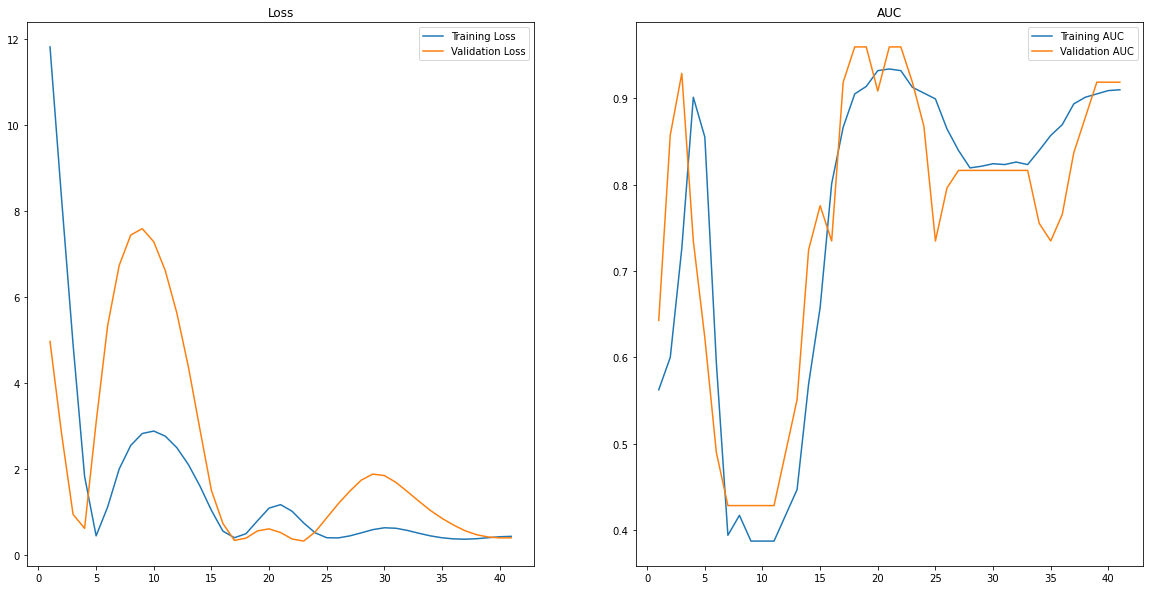

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

epochs_range = range(1, epochs+1)
train_loss,val_loss = history.history['loss'], history.history['val_loss']
train_auc,val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1,2,1)
plt.plot(epochs_range, train_loss, label ='Training Loss')
plt.plot(epochs_range, val_loss, label ='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, train_auc, label ='Training AUC')
plt.plot(epochs_range, val_auc, label ='Validation AUC')
plt.title('AUC')
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 77ms/step - loss: 0.7056 - accuracy: 0.8621 - auc: 0.7174


[0.7056089043617249, 0.8620689511299133, 0.717391312122345]

In [ ]:
print(np.argmin(val_loss), np.argmax(val_auc))

22 17
